# Medical Data Visualizer

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [122]:
# Import data
df_raw = pd.read_csv('medical_examination.csv')
df = df_raw.copy()

In [123]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [136]:
# Add 'overweight' column
df['overweight'] = [1 if cell>25 else 0 for cell in df['weight']/((df['height']/100)**2)]

In [120]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.replace({
    'cholesterol':{1:0, 2:1, 3:1},
    'gluc':{1:0, 2:1, 3:1}
    }, inplace=True)

In [131]:
df['cholesterol'].replace({1:0, 2:1, 3:1}, inplace=True)
df['gluc'].replace({1:0, 2:1, 3:1}, inplace=True)

In [134]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0


In [137]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=sorted(['cholesterol','gluc','smoke','alco','active','overweight']))
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [138]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat['total']=0
df_cat = df_cat.groupby(['cardio','variable','value'], as_index=False).count()
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


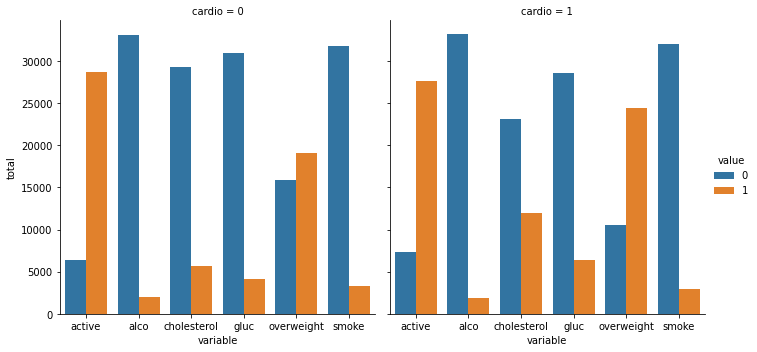

In [139]:
sns.catplot(x='variable',
            y='total',
            hue='value',
            col='cardio',
            kind='bar',
            data=df_cat
            );

Clean the data. Filter out the following patient segments that represent incorrect data:

- diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile

Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

In [41]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [56]:
# Clean the data
df_heat = df[
  (df['ap_lo'] <= df['ap_hi']) &
  (df['height'] >= df['height'].quantile(0.025)) &
  (df['height'] <= df['height'].quantile(0.975)) &
  (df['weight'] >= df['weight'].quantile(0.025)) &
  (df['weight'] <= df['height'].quantile(0.975))
]
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [59]:
# Calculate the correlation matrix
corr = df_heat.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002821,0.003895,0.001208,0.001120,0.003470,0.001388,0.004529,0.003373,-0.002995,-0.000136,0.005781,0.004253,-0.000338
age,0.002821,1.000000,-0.018264,-0.076852,0.061244,0.018869,0.150586,0.129016,0.087544,-0.046379,-0.027343,-0.011157,0.238122,0.088639
gender,0.003895,-0.018264,1.000000,0.509951,0.116858,0.005140,0.060214,-0.037233,-0.020417,0.336808,0.169539,0.007066,0.003764,-0.050646
height,0.001208,-0.076852,0.509951,1.000000,0.241029,0.005034,0.022938,-0.059428,-0.026594,0.190022,0.091999,-0.006027,-0.019487,-0.140696
weight,0.001120,0.061244,0.116858,0.241029,1.000000,0.027796,0.237403,0.142891,0.122936,0.055325,0.060023,-0.014989,0.173771,0.619266
ap_hi,0.003470,0.018869,0.005140,0.005034,0.027796,1.000000,0.074315,0.023205,0.011772,-0.001729,0.001121,-0.000336,0.051247,0.018205
ap_lo,0.001388,0.150586,0.060214,0.022938,0.237403,0.074315,1.000000,0.152107,0.079768,0.023500,0.034892,0.000643,0.328117,0.177802
cholesterol,0.004529,0.129016,-0.037233,-0.059428,0.142891,0.023205,0.152107,1.000000,0.385881,0.014728,0.040615,0.002083,0.204210,0.131518
gluc,0.003373,0.087544,-0.020417,-0.026594,0.122936,0.011772,0.079768,0.385881,1.000000,-0.000160,0.018284,-0.011097,0.089500,0.093102
smoke,-0.002995,-0.046379,0.336808,0.190022,0.055325,-0.001729,0.023500,0.014728,-0.000160,1.000000,0.339757,0.025121,-0.018696,-0.001630


In [60]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

<AxesSubplot:>

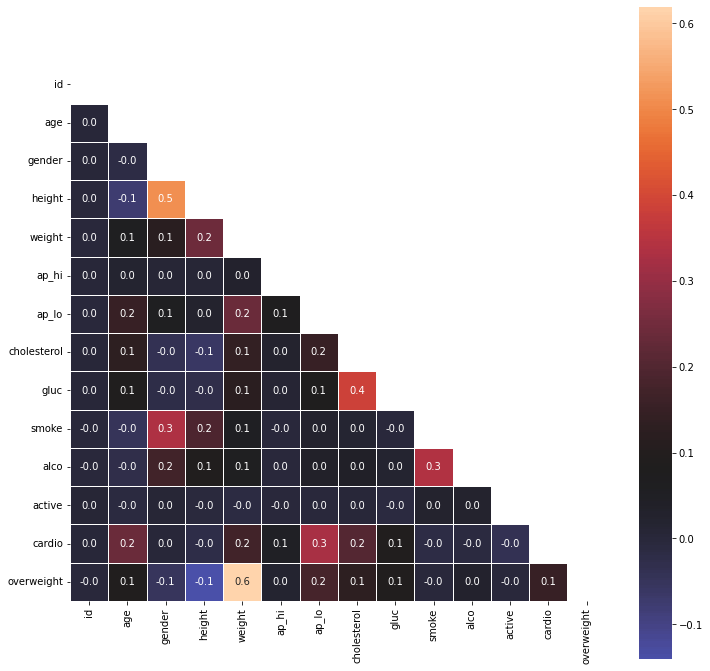

In [96]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, linewidths=1, mask=mask, square=True, annot=True, fmt='.1f', center=0.08)

References
- https://forum.freecodecamp.org/t/fcc-medical-data-visualizer/408460/3
- https://seaborn.pydata.org/examples/many_pairwise_correlations.html
